## IE517 MLF F20
## Module 4 Homework (Regression)

Yaxuan Wang (662869931)

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Part 1: Exploratory Data Analysis

#### Summary Statistic

In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


As we can see from the summary statistic, this dataset contains 506 samples, 13 features, and one target variable. All the variables are continuous. 

#### Scatterplot matrix

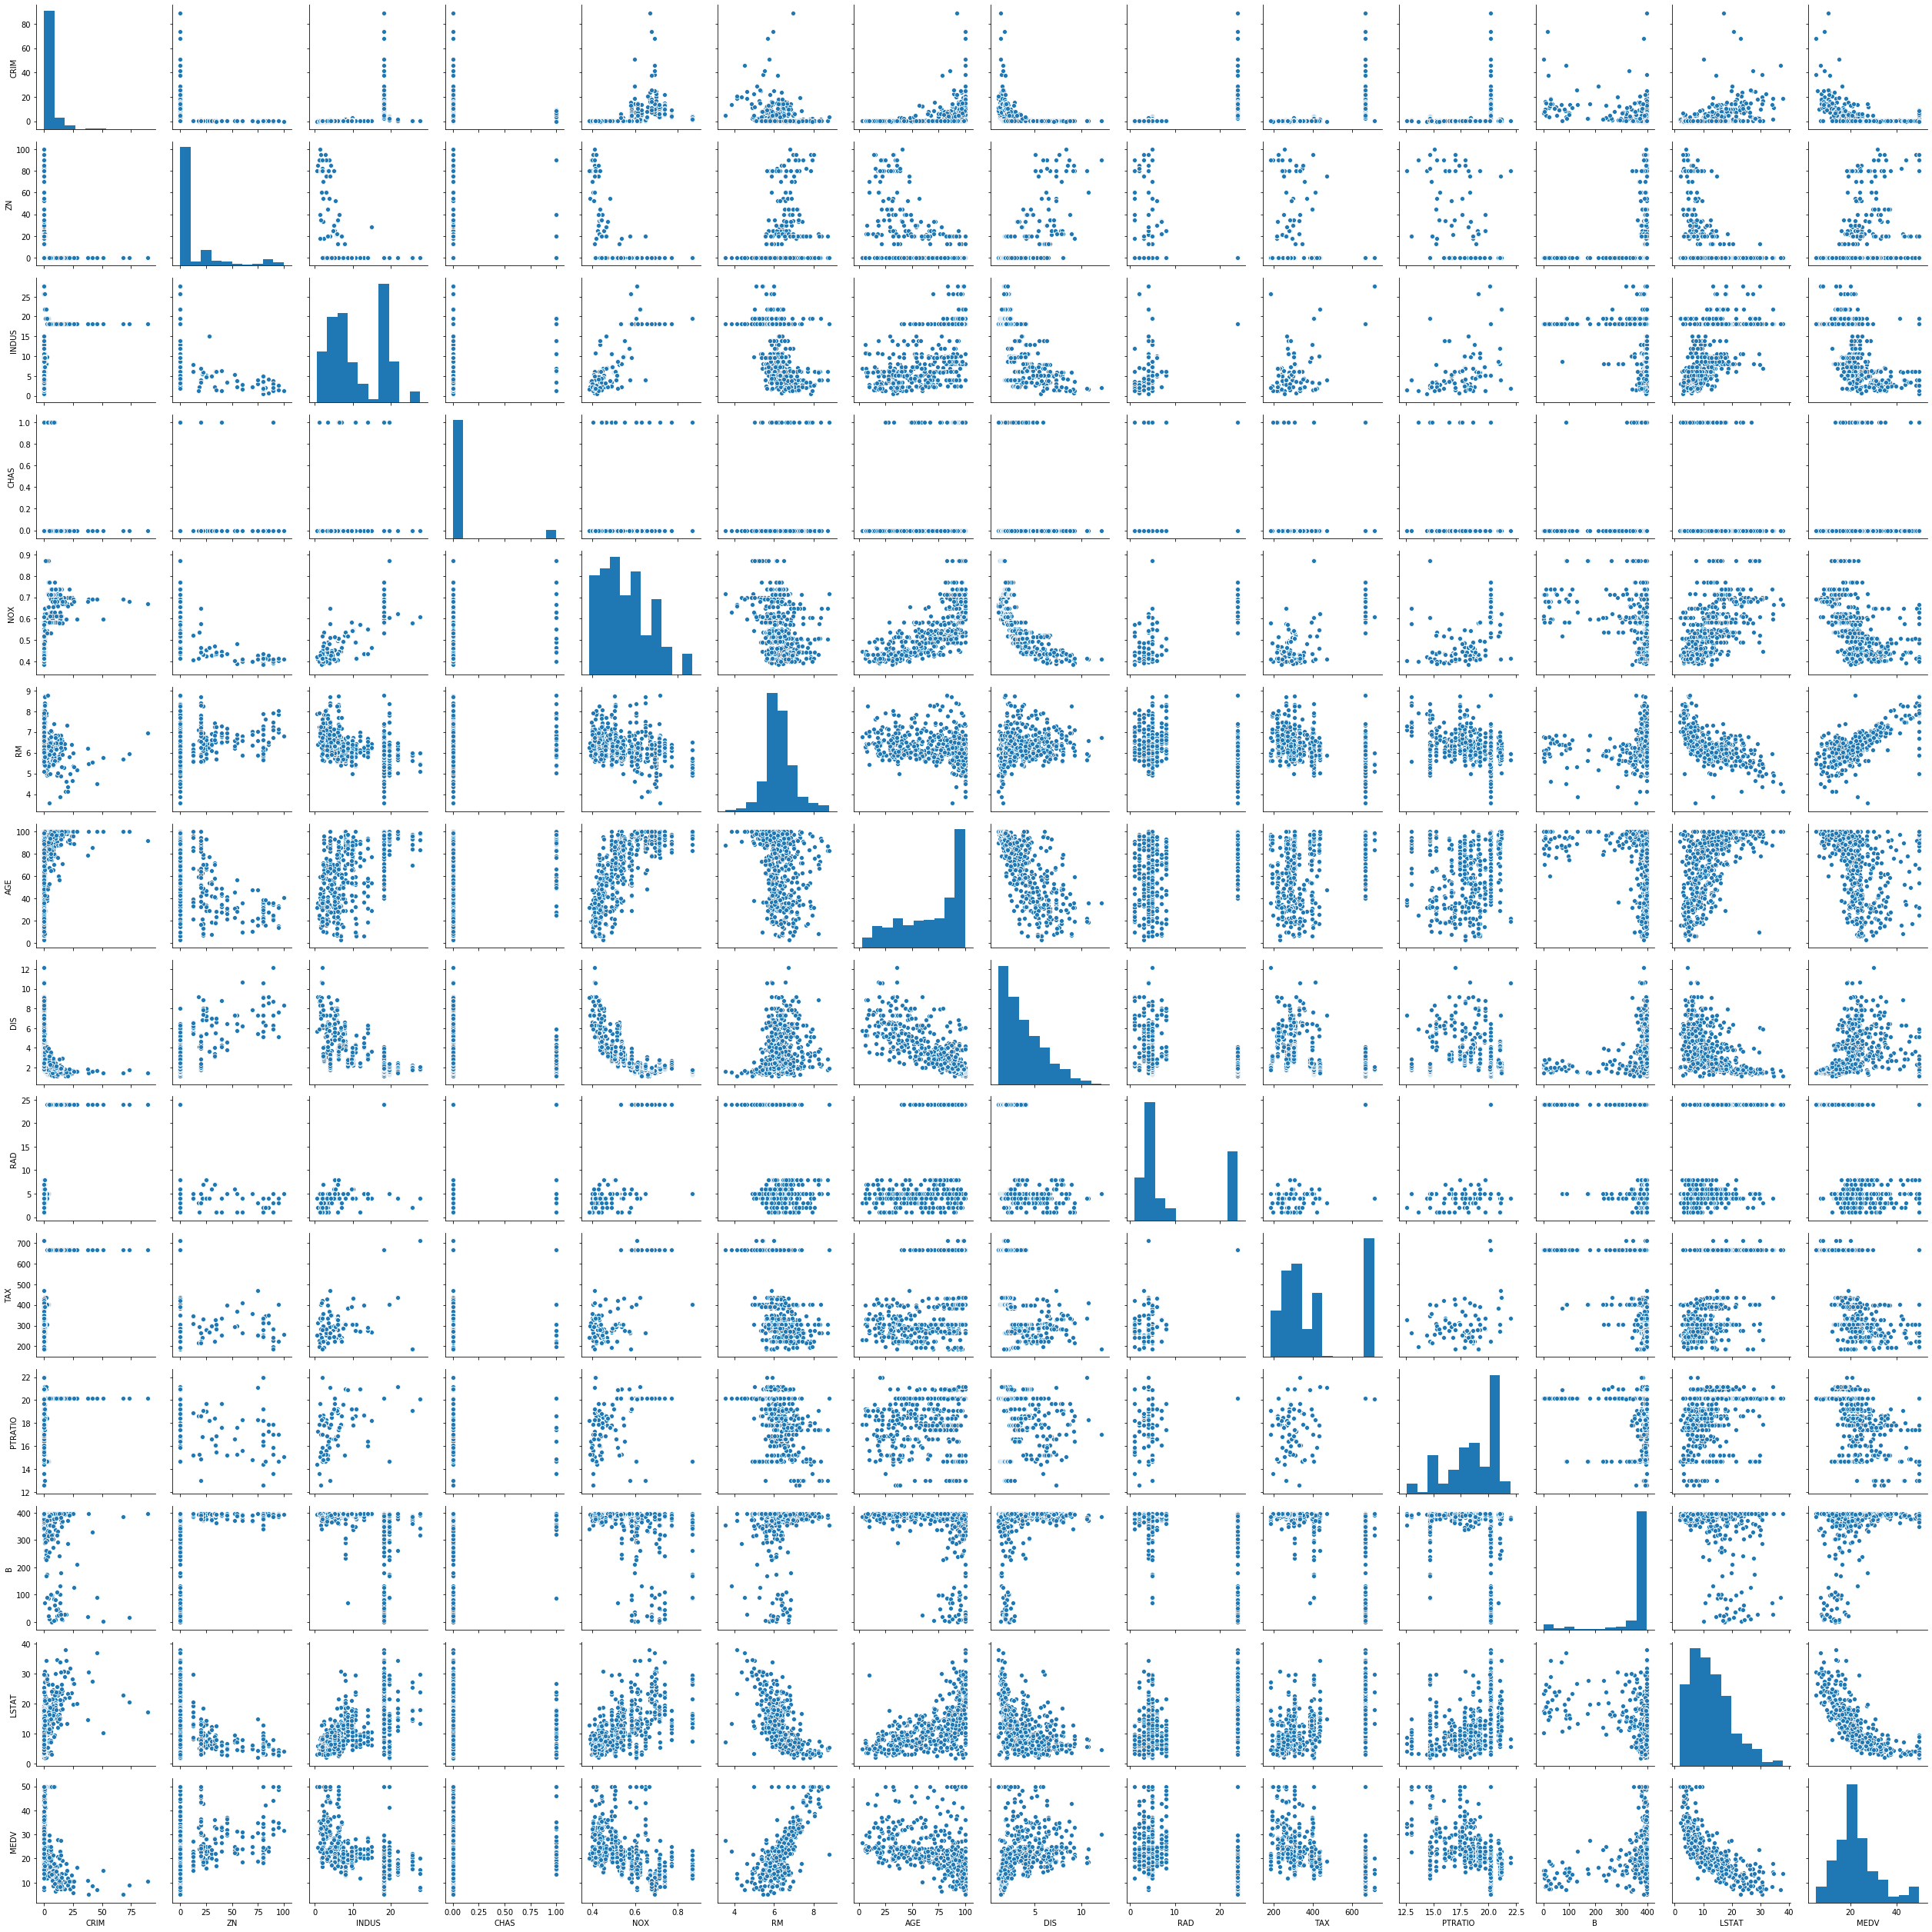

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.tight_layout()
plt.show()

If we focus on the target variable, `MEDV`, we can observe that `LSTAT`, and `RM`, and `CRIM` has some positive or negative linear relationship with `MEDV`, although there are some noise. 

#### Heatmap/Correlation Matrix

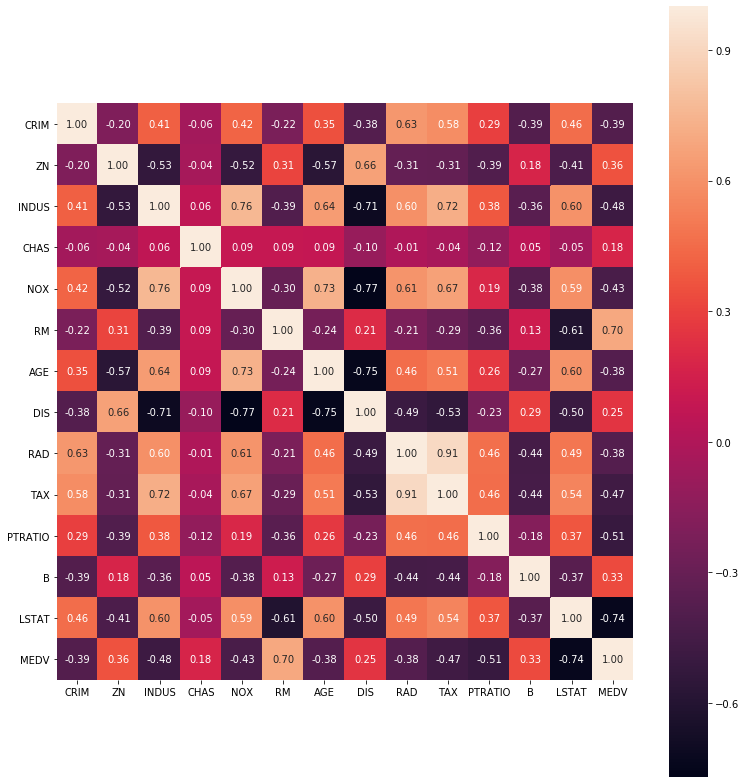

In [21]:
import numpy as np
import matplotlib.pyplot as plt


cm = np.corrcoef(df.values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize=(11, 11))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns)

bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

The heatmap shows the Pearson's correlation between each pair of variables. Let's still focus on our target variable, `MEDV`. We can see that the largest correlation with `MEDV` is `LSTAT`, whose correlation is -0.74. And the second large correlated explanatory variable is `RM`, whose correlation is 0.70. This observation actually have the same conclusion we draw from scatter plot. Thus, in the next part, we will test the linear regression model on those high correlated variables. 

#### Split Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Now in order to test and compare our model performance in next part, we are spliting data into training and test sets.  I use 80% of the data for the training set and the rest of 20% as our testing set.

### Part 2: Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

#### The Fittted Model

In [33]:
print(slr.coef_)

[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


The above are the coefficients for this linear regression model. The first number $-1.13055924 \times 10^{-1}$ is our y-intercept when all x's are zero. The second number $3.01104641 \times 10^{-2}$ are the coefficient for the explanatory variable `CRIM`. And the rest numbers are coefficients for each features. 

#### Residual Plot of Our Fitted Linear Regression Model

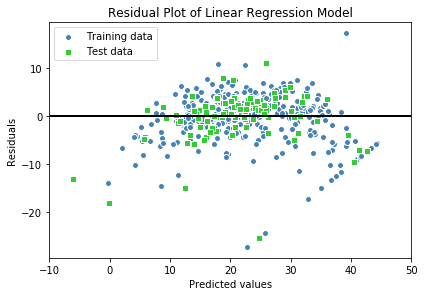

In [30]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title("Residual Plot of Linear Regression Model")

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

From the residual plot, we can see that most of the errors are randomly distributed and they are scattered around the center line, which means most ofexplanatory information are captured in this linear regression model and have small residuals. However, there is a pattern in the right bottom corner. Some residuals form a straight line, which means some explanatory info did not been captured. And those points have relatively large residuals. 

#### Performance Metrices by MSE

In [35]:
from sklearn.metrics import mean_squared_error

print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

The MSE train: 21.641, test: 24.291


We can see that the Mean Squared Error (MSE) for the training set is 21.641, whilte the one for the testing set is 24.291, which is relatively larger. It can indicates that our model is overfitting the training set. Thus, we would need to use regularized regression in the next part to prevent overfitting. 

#### Performance Metrices by Coefficient of Determination

In [37]:
from sklearn.metrics import r2_score

print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

The coefficient of determination train: 0.751, test: 0.669


We can see that the coefficient of determination, $R^2$, for the training set is 0.751, which is pretty high. So the linear regression model fits the training set good. The $R^2$ for the testing set is 0.669, which is only a little bit lower. Still not bad. 

### Part 3 Regularized Linear Regression

### Part 3.1: Ridge Regression

#### Best Alpha for Ridge by Comparing CV Score

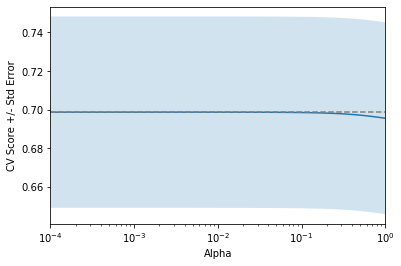

In [42]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

    
    
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
ridge = Ridge(normalize = False)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

The above plot shows the average scores of Ridge Regression by 10-cross-validation tested by different alpha. As the alpha increase, the CV scores decreased after alpha = $10^{-2}$. Thus, I will pick alpha = $10^{-2}$ as our best alpha for this data set. 

#### The Fittted Model

In [61]:
ridge = Ridge(alpha=0.01)

ridge.fit(X_train, y_train)
y_train_r_pred = ridge.predict(X_train)
y_test_r_pred = ridge.predict(X_test)

print(ridge.coef_)
#print(y_train_pred == y_train)

[-1.12985398e-01  3.01477290e-02  3.97929679e-02  2.78084775e+00
 -1.70656728e+01  4.43960807e+00 -6.40468889e-03 -1.44590837e+00
  2.62172574e-01 -1.06610344e-02 -9.13880463e-01  1.23566074e-02
 -5.08818863e-01]


The above are the coefficients for this ridge regression model. The first number $-1.12985398 \times 10^{-1}$ is our y-intercept when all x's are zero. The second number $3.01477290 \times 10^{-2}$ are the coefficient for the explanatory variable `CRIM`. And the rest numbers are coefficients for each features. 

#### Residual Plot of Our Fitted Ridge Regression Model

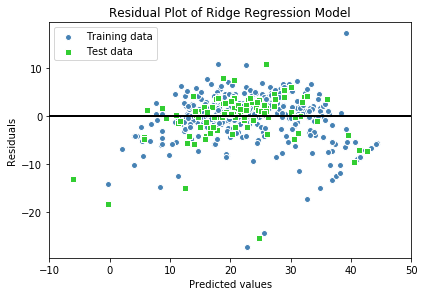

In [58]:
plt.scatter(y_train_r_pred,  y_train_r_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_r_pred,  y_test_r_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title("Residual Plot of Ridge Regression Model")

plt.show()

The residual plot of ridge regression actually is the same as our linear regression. This is because our optimal alpha, 0.01, is too small. When alpha is too small, the ridge regression is very similar to linear regression. 

#### Performance Metrices by MSE

In [59]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_r_pred),
        mean_squared_error(y_test, y_test_r_pred)))

The MSE train: 21.646, test: 24.301


The Mean Squared Error (MSE) for the training set is 21.641, while the one for the testing set is 24.291, which is relatively larger. Note that the MSE are still the same as the linear regression due to the small alpha. 

#### Performance Metrices by Coefficient of Determination

In [60]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_r_pred),
        r2_score(y_test, y_test_r_pred)))

The coefficient of determination train: 0.751, test: 0.669


The $R^2$ for the training set is 0.751, which is pretty high. And the $R^2$ for the testing set is 0.669, which is only a little bit lower. Note that the MSE are still the same as the linear regression due to the small alpha. 

#### Best Alpha by Compareing MSE and R^2

In [77]:
alpha_space = np.logspace(-4, 0, 50)

for a in alpha_space:
    ridge = Ridge(alpha=a)
    
    ridge.fit(X_train, y_train)
    y_train_r_pred = ridge.predict(X_train)
    y_test_r_pred = ridge.predict(X_test)
    
    print('When alpha =',a, ', The MSE train: %.3f, test: %.3f,     and R^2 train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_r_pred),
        mean_squared_error(y_test, y_test_r_pred),
        r2_score(y_train, y_train_r_pred),
        r2_score(y_test, y_test_r_pred)))

When alpha = 0.0001 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00012067926406393288 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00014563484775012445 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00017575106248547912 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00021209508879201905 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.0002559547922699536 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00030888435964774815 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.0003727593720314938 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.0004498432668969444 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
Wh

Let's mainly focus on the testing set's MSE and $R^2$. 

For MSE, as alpha increase, the MSE first keeps constant of 24.291 from alpha=0.0001 to alpha = 0.005179474679231213, then keeps increasing. Thus, the MSE for testing test of 24.291 is the smallest. The best alpha will be any one of the alpha from 0.0001 to 0.005179474679231213 for the testing set since its MSE is the smallest. 

For $R^2$, as alpha increase, $R^2$ first keeps the same of 0.669, then starts decreasing. When alpha = 1.0, the $R^2$ reaches the smallest value, 0.666. Thus, the best alpha will be any alpha from 0.001 to 0.15264179671752318 since its $R^2$ is the largest, if choosing $R^2$ as our performance metric. 

### Part 3.2: LASSO Regression

#### Best Alpha for LASSO by Comparing CV Score

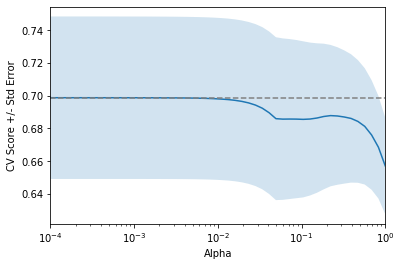

In [64]:
from sklearn.linear_model import Lasso

alpha_space = np.logspace(-4, 0, 50)
lasso_scores = []
lasso_scores_std = []
lasso = Lasso(normalize = False)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    lasso.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    lasso_cv_scores = cross_val_score(lasso, X_train, y_train, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

# Display the plot
display_plot(lasso_scores, lasso_scores_std)

The above plot shows the average scores of LASSO Regression by 10-cross-validation tested by different alpha. As the alpha increase, the CV scores decreased after alpha =  $8 \times 10^{−3}$ . Thus, I will pick alpha =  $8 \times 10^{−3}$ as our best alpha for this data set. Notice that our alpha is really small, so we expect the performance metric of LASSO regression will be very similar to our linear regression. 

#### The Fittted Model

In [67]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.008, normalize=True)

# Fit the regressor to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.fit(X_train,y_train).coef_
print(lasso_coef)

# Predict the X
y_train_l_pred = lasso.predict(X_train)
y_test_l_pred = lasso.predict(X_test)

[-6.14780468e-02  2.54179758e-03 -0.00000000e+00  2.58754176e+00
 -1.05582205e+01  4.73040570e+00 -0.00000000e+00 -8.66694594e-01
  7.31922216e-03 -0.00000000e+00 -8.01300261e-01  1.06024400e-02
 -5.05074359e-01]


The above are the coefficients for this LASSO regression model. The first number $-6.14780468 \times 10^{-2}$ is our y-intercept when all x's are zero. The second number $3.2.54179758 \times 10^{-3}$ are the coefficient for the explanatory variable `CRIM`. And the rest numbers are coefficients for each features.

#### Residual Plot of Our Fitted LASSO Regression Model

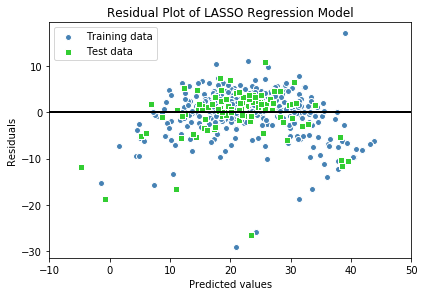

In [68]:
plt.scatter(y_train_l_pred,  y_train_l_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_l_pred,  y_test_l_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.title("Residual Plot of LASSO Regression Model")

plt.show()

This is exactly the same issue with Ridge regression. The residual plot is the same as our linear regression. This is because our optimal alpha, 0.008, is too small. When alpha is too small, the LASSO regression is very similar to linear regression.

#### Performance Metrices by MSE

In [70]:
print('The MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_l_pred),
        mean_squared_error(y_test, y_test_l_pred)))

The MSE train: 22.717, test: 26.724


The Mean Squared Error (MSE) for the training set is 22.717, while the one for the testing set is 26.724, which is relatively larger. The MSE's of LASSO regression are both a bit bigger than the linear regression and ridge regression. 

#### Performance Metrices by Coefficient of Determination

In [71]:
print('The coefficient of determination train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_l_pred),
        r2_score(y_test, y_test_l_pred)))

The coefficient of determination train: 0.739, test: 0.636


The  𝑅2  for the training set is 0.739, which is pretty high. And the  𝑅2  for the testing set is 0.636, which is only a little bit lower. The $R^2$'s of LASSO regression are both a smaller than the linear regression and ridge regression. 

#### Best Alpha by Compareing MSE and R^2

In [79]:
alpha_space = np.logspace(-4, 0, 50)

for a in alpha_space:
    lasso = Lasso(alpha=a)
    
    lasso.fit(X_train, y_train)
    y_train_l_pred = lasso.predict(X_train)
    y_test_l_pred = lasso.predict(X_test)
    
    print('When alpha =',a, ', The MSE train: %.3f, test: %.3f,     and R^2 train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_l_pred),
        mean_squared_error(y_test, y_test_l_pred),
        r2_score(y_train, y_train_l_pred),
        r2_score(y_test, y_test_l_pred)))

When alpha = 0.0001 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00012067926406393288 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00014563484775012445 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00017575106248547912 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00021209508879201905 , The MSE train: 21.641, test: 24.291,     and R^2 train: 0.751, test: 0.669
When alpha = 0.0002559547922699536 , The MSE train: 21.641, test: 24.290,     and R^2 train: 0.751, test: 0.669
When alpha = 0.00030888435964774815 , The MSE train: 21.641, test: 24.290,     and R^2 train: 0.751, test: 0.669
When alpha = 0.0003727593720314938 , The MSE train: 21.641, test: 24.290,     and R^2 train: 0.751, test: 0.669
When alpha = 0.0004498432668969444 , The MSE train: 21.641, test: 24.290,     and R^2 train: 0.751, test: 0.669
Wh

Let's mainly focus on the testing set's MSE and $R^2$. 

For MSE, as alpha increase, the MSE first decreases until alpha = 0.0035564803062231283, whose MSE is 24.286. Then the MSE increases until alpha = 0.15264179671752318, then keeps decreasing. If we choose MSE as our performance metric, the best alpha will be 0.0035564803062231283 for the testing set, whose MSE 24.286 is the minimum.

For $R^2$, as alpha increase, $R^2$ first keeps the same of 0.669, then decreases until the minimun of 0.656 when alpha = 0.05963623316594643, then starts increasing to its maximun, 0.671 when alpha = 0.6866488450042998. Thus, the best alpha will be 0.6866488450042998 for the testing set since its $R^2$ reaches the maximum, if choosing $R^2$ as our performance metric. 

### Part 4: Conclusions

In this report, I first conducted EDA on the housing.csv dataset and found out there existed linear relationship between some features and the target variable, MEDV. I splited data into 80% training and 20% test sets.Then, I run linear regression models on all the features and target variable. I found there were overfitting problem. to test the performance of the fitted model, I plotted the residual plot of this model, and computed the performance metrices, MSE and $R^2$. After that, to prevent overfitting problems, I used Ridge regression (L2 Regularization) and LASSO regression (L1 Regularization) to fit our training data, then test the model in our testing data by residual plot, MSE, and $R^2$. Additionally, in each of the regularization regression model, I used two different methods to find the best alpha. The first one is using 10-cross-validation to compute the averaged CV scores, and the second one is testing different alpha on ridge/LASSO models to find which alpha gives the lowest MSE and highest $R^2$. 

In conclusion, if choosing MSE as our performance metrices, the linear regression model gives the smallest MSE, 21.641. If choosing $R^2$ as our performance metrices, the LASSO regression gives the largest $R^2$, 0.671 when alpha is around 0.6866. 

Also, when comparing the averaged 10-fold-cv-scores to choose the best alpha, the best alpha for both ridge and LASSO regressions are very small. Thus, they would be very similar to linear regression model, then the performance metrices would be very similar as well. 

### Part 5: Appendix

Link to github repo:



In [80]:
print("My name is {Yaxuan Wang}")
print("My NetID is: {662869931}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yaxuan Wang}
My NetID is: {662869931}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
